1. 80년대 : 100이닝 기준 / 2010년대 : 144이닝 기준으로 선발 & 마무리 투수 구분
2. 2010년대 선수들의 스탯 & 연봉 학습 -> 80년대 최동원 선수의 스탯을 input으로 넣으면 최동원 선수의 연봉 output
3. 스탯에서 비율 지표로 가면 상관이 없는데, 숫자 자체로 가게 되면 100이닝 기준 -> 144이닝 기준으로 매핑해야함


In [4]:
# ! pip install seaborn

In [2]:
# import pandas as pd 
import warnings
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
pd.options.display.max_rows = 300

warnings.simplefilter(action='ignore')

C:\Users\eric3\anaconda3\envs\ds_study\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


url library 로 table 긁는데
그 과정을 selenium으로 페이지 옮겨가면서 동적 크롤링

In [26]:
import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions


## 2015년 ~ 2022년

In [9]:
# page = requests.get('http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2015&ye=2015&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o1=Win&o2=SO&de=1&lr=0&tr=&cv=&ml=1&sn=100&si=&cn=')
# soup = BeautifulSoup(page.text, 'html.parser')
# data = soup.find("table", {'id':'mytable'})
# table = parser.make2d(data)

# df = pd.DataFrame(data = table[1:], columns = table[1])
# df

In [27]:
# import requests
# from bs4 import BeautifulSoup
# from html_table_parser import parser_functions
# import pandas as pd

# whole = []
# for year in range(2015, 2017, 1):
#     url = 'http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys={}&ye={}&se=0&te=&tm=&\ty=0&qu=auto&po=0&as=&ae=&hi=&un=&pl=&da=1&o2=CG&de=1&lr=0&tr=&cv=&ml=1&sn=100&pa=0&si=&cn=&o1=GP'.format(year, year)
#     req = requests.get(url)
#     soup = BeautifulSoup(req.text, 'html.parser')
#     data = soup.find('table',{'id':'mytable'})
#     
tData01 tt
#     time.sleep(2)
#     table = parser_functions.make2d(data)
#     df = pd.DataFrame(data=table[1:], columns=table[1])
#     whole.append(df)
# whole = pd.concat(whole)
# whole

In [10]:
# pip install tqdm

In [11]:
# import warnings
# import time
# from selenium import webdriver
# from bs4 import BeautifulSoup
# from tqdm import tqdm_notebook
# warnings.simplefilter(action='ignore')

## 새로!

In [ ]:
#cphContents_cphContents_cphContents_ddlSeason_ddlSeason

In [3]:
years_1 = list(range(1983,1989,1))
years_2 = list(range(2015,2021,1))
years = years_1 + years_2

In [4]:
from selenium.webdriver.support.ui import Select

import requests
from bs4 import BeautifulSoup
from html_table_parser import parser_functions
import pandas as pd

## Part 1

## 선수 기록 데이터 크롤링

### 1980년대

In [19]:
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx'
driver = webdriver.Chrome('../../chromedriver.exe')
driver.get(url)

years_1 = list(range(1983,1989,1))
years_2 = list(range(2015,2021,1))
years = years_1 + years_2

temp = []
number = 0.3

# req = requests.get('https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx')
# soup = BeautifulSoup(req.text, 'html.parser')


for year in years_1:
    time.sleep(1)
    driver.find_element_by_css_selector('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason').send_keys('{}'.format(year))
    time.sleep(1)
    # print(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam').text)
    # select = Select(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam'))
    # select.select_by_value('HD')
    a= driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam').find_elements_by_tag_name("option")  # find_elements_by_tag_name = bs4의 find_all
    # print(len(a))
    team_list = []
    for data in a[1:]:
        team_list.append(data.get_attribute('value'))

    # cnt = 0

    for team in team_list:
        # time.sleep(0.2)
        select = Select(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam'))
        select.select_by_value(team) # 클릭 없이 선택하는 것
        time.sleep(number*2) # 여기까지 왓어


        soup = BeautifulSoup(driver.page_source, 'html.parser')
        baseball = soup.find_all('table')
        table = parser_functions.make2d(baseball[0])
        # print(len(table[1:]))

        col = table[0]
        temp.extend(table[1:])
    # cnt += len(temp)
    print(len(temp))

        




# pd.DataFrame(temp, columns = col).drop(['순위'], axis=1)
        # print(temp)

        # data = soup.find('table', {'class':'tData01 tt'})
        # table = parser_functions.make2d(data)

        # df = pd.DataFrame(data = temp, columns = col)
        # # df = df.iloc[1:,1:]
        # df['year'] = year
        # # temp.append(df)
        # time.sleep(number*2)

# 데이터 프레임 합치기

# for data in temp:
#     pd.concat([])

    # print(team_list)
    # select.select_by_value()
#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child(1)
    # print(year)


55
114
183
272
360
452


In [20]:
df1 = pd.DataFrame(temp, columns = col).drop(['순위'], axis=1)
df1['year'] = 0



a = list(range(0,55))
b = list(range(55,114))
c = list(range(114,183))
d = list(range(183,272))
e = list(range(272,360))
f = list(range(360,452))

for idx in df1.index:
    if idx in a:
        df1.loc[idx,'year'] = 1983

    elif idx in b:
        df1.loc[idx,'year'] = 1984

    elif idx in c:
        df1.loc[idx,'year'] = 1985

    elif idx in d:
        df1.loc[idx,'year'] = 1986

    elif idx in e:
        df1.loc[idx,'year'] = 1987

    elif idx in f:
        df1.loc[idx,'year'] = 1988

df1.tail(10)

,선수명,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,TBF,IP,H,HR,BB,HBP,SO,R,ER,year
442,김진욱,OB,3.10,29,5,2,11,8,2,0,...,559,139 1/3,116,6,45,8,73,52,48,1988
443,계형철,OB,3.75,33,2,0,10,12,2,0,...,558,129 2/3,121,7,62,2,48,59,54,1988
444,한오종,OB,3.81,26,2,1,4,4,0,0,...,496,115 2/3,108,9,57,3,60,54,49,1988
445,장호연,OB,3.95,36,3,1,8,12,1,0,...,629,146,163,12,44,6,46,76,64,1988
446,이상훈,OB,4.50,27,1,1,2,2,0,0,...,352,84,76,8,34,2,29,45,42,1988
447,김강익,OB,5.28,6,0,0,0,1,0,0,...,63,15 1/3,15,4,5,0,3,9,9,1988
448,박상열,OB,5.59,13,0,0,0,3,0,0,...,216,46 2/3,53,9,23,4,12,34,29,1988
449,황태환,OB,6.52,23,1,0,0,2,0,0,...,221,49 2/3,58,7,21,1,11,38,36,1988
450,하창우,OB,6.61,5,1,0,0,1,0,0,...,70,16 1/3,22,1,3,1,2,13,12,1988
451,박노준,OB,18.00,1,0,0,0,0,0,0,...,17,3,5,0,1,1,1,6,6,1988


In [21]:
# 1980년대는 452행
df1.shape

(452, 21)

## Part 2

### 2010년대

In [23]:
url = 'https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx'
driver = webdriver.Chrome('../../chromedriver.exe')
driver.get(url)

years_1 = list(range(1983,1989,1))
years_2 = list(range(2015,2021,1))
years = years_1 + years_2

temp = []
number = 0.3

# req = requests.get('https://www.koreabaseball.com/Record/Player/PitcherBasic/BasicOld.aspx')
# soup = BeautifulSoup(req.text, 'html.parser')


for year in years_2:
    # time.sleep(1)
    driver.find_element_by_css_selector('#cphContents_cphContents_cphContents_ddlSeason_ddlSeason').send_keys('{}'.format(year))
    time.sleep(1)
    # print(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam').text)
    # select = Select(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam'))
    # select.select_by_value('HD')
    a= driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam').find_elements_by_tag_name("option")  # find_elements_by_tag_name = bs4의 find_all
    # print(len(a))
    team_list = []
    for data in a[1:]:
        team_list.append(data.get_attribute('value'))

    # cnt = 0

    for team in team_list:
        # time.sleep(0.2)
        select = Select(driver.find_element_by_id('cphContents_cphContents_cphContents_ddlTeam_ddlTeam'))
        select.select_by_value(team) # 클릭 없이 선택하는 것
        time.sleep(number*2) # 여기까지 왓어


        soup = BeautifulSoup(driver.page_source, 'html.parser')
        baseball = soup.find_all('table')
        table = parser_functions.make2d(baseball[0])
        # print(len(table[1:]))

        col = table[0]
        temp.extend(table[1:])
        time.sleep(1)
    # cnt += len(temp)
    print(len(temp))

        




# pd.DataFrame(temp, columns = col).drop(['순위'], axis=1)
        # print(temp)

        # data = soup.find('table', {'class':'tData01 tt'})
        # table = parser_functions.make2d(data)

        # df = pd.DataFrame(data = temp, columns = col)
        # # df = df.iloc[1:,1:]
        # df['year'] = year
        # # temp.append(df)
        # time.sleep(number*2)

# 데이터 프레임 합치기

# for data in temp:
#     pd.concat([])

    # print(team_list)
    # select.select_by_value()
#cphContents_cphContents_cphContents_ddlTeam_ddlTeam > option:nth-child(1)
    # print(year)


244
494
733
993
1250
1531


In [24]:
df2 = pd.DataFrame(temp, columns = col).drop(['순위'], axis=1)
df2['year'] = 0



a = list(range(0,244))
b = list(range(244,494))
c = list(range(494,733))
d = list(range(733,993))
e = list(range(993,1250))
f = list(range(1250,1531))

for idx in df2.index:
    if idx in a:
        df2.loc[idx,'year'] = 2015

    elif idx in b:
        df2.loc[idx,'year'] = 2016

    elif idx in c:
        df2.loc[idx,'year'] = 2017

    elif idx in d:
        df2.loc[idx,'year'] = 2018

    elif idx in e:
        df2.loc[idx,'year'] = 2019

    elif idx in f:
        df2.loc[idx,'year'] = 2020


df2

,선수명,팀명,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,year
0,김정인,넥센,0.00,1,0,0,0,0,-,1,0,0,0,0,0,0,0,0.00,2015
1,양훈,넥센,1.41,16,2,1,0,0,0.667,38 1/3,33,1,14,0,15,9,6,1.23,2015
2,조상우,넥센,3.09,70,8,5,5,19,0.615,93 1/3,65,4,41,6,89,36,32,1.14,2015
3,밴헤켄,넥센,3.62,32,15,8,0,0,0.652,196 2/3,190,14,67,1,193,92,79,1.31,2015
4,손승락,넥센,3.82,58,4,6,23,0,0.400,61 1/3,73,6,13,3,63,35,26,1.40,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,김택형,SK,8.61,31,1,3,0,3,0.250,23,26,5,20,0,22,26,22,2.00,2020
1527,양선률,SK,9.00,1,0,0,0,0,-,1,1,1,2,0,0,1,1,3.00,2020
1528,신재웅,SK,9.31,24,2,0,0,0,1.000,19 1/3,26,5,14,0,11,20,20,2.07,2020
1529,김찬호,SK,27.00,3,0,0,0,0,-,2,5,1,4,0,1,6,6,4.50,2020


In [39]:
final = pd.concat([df1, df2], axis=0)
final.reset_index(drop=True, inplace=True)
# final

In [40]:
final.to_csv('pitcher.csv',index=False, encoding='cp949')

In [49]:
pitcher = pd.read_csv('pitcher.csv',encoding='cp949')

## 연봉 데이터 수집

In [28]:
import time

temp = []

year_list = list(range(2015,2022)) # 2015 ~ 2021
team_number = list(range(1,11)) + [101,102]
team = ['KIA+해태','삼성','두산+OB','SK','LG+MBC','롯데','한화+빙그레','넥센+히어로즈','NC','kt','현대+태평양+청보+삼미','쌍방울']
tm = dict(zip(team_number, team))


for year in tqdm(year_list):
    for number in team_number:



        url = 'http://www.statiz.co.kr/salary.php?opt=0&sopt={}&cnv=&pos=&te={}'.format(year,number)
        driver = webdriver.Chrome('../../chromedriver.exe')
        driver.get(url)
 
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        data = soup.find('table',{"class" : "table table-striped"})
        # data
        table = parser_functions.make2d(data)
        col = table[0]

        df = pd.DataFrame(data = table[1:], columns=col)
        temp.append(df)
        driver.close()
        print(f'{year}년도의 {tm[number]} 팀의 데이터 수집이 완료되었습니다.')
        time.sleep(1)
    
    print(f'{year}년도 데이터 수집이 완료되었습니다.')
    print('===========================================================')

temp



# for idx in range(1,len(temp)): # 1,2
#     df = pd.concat([base, temp[idx]], axis = 0)
#     base = df

# base

  0%|          | 0/7 [00:00<?, ?it/s]

2015년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2015년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2015년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2015년도의 SK 팀의 데이터 수집이 완료되었습니다.
2015년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2015년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2015년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2015년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2015년도의 NC 팀의 데이터 수집이 완료되었습니다.
2015년도의 kt 팀의 데이터 수집이 완료되었습니다.
2015년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2015년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 14%|█▍        | 1/7 [01:55<11:34, 115.68s/it]

2015년도 데이터 수집이 완료되었습니다.
2016년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2016년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2016년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2016년도의 SK 팀의 데이터 수집이 완료되었습니다.
2016년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2016년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2016년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2016년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2016년도의 NC 팀의 데이터 수집이 완료되었습니다.
2016년도의 kt 팀의 데이터 수집이 완료되었습니다.
2016년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2016년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 29%|██▊       | 2/7 [03:51<09:37, 115.49s/it]

2016년도 데이터 수집이 완료되었습니다.
2017년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2017년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2017년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2017년도의 SK 팀의 데이터 수집이 완료되었습니다.
2017년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2017년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2017년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2017년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2017년도의 NC 팀의 데이터 수집이 완료되었습니다.
2017년도의 kt 팀의 데이터 수집이 완료되었습니다.
2017년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2017년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 43%|████▎     | 3/7 [05:37<07:25, 111.32s/it]

2017년도 데이터 수집이 완료되었습니다.
2018년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2018년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2018년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2018년도의 SK 팀의 데이터 수집이 완료되었습니다.
2018년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2018년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2018년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2018년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2018년도의 NC 팀의 데이터 수집이 완료되었습니다.
2018년도의 kt 팀의 데이터 수집이 완료되었습니다.
2018년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2018년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 57%|█████▋    | 4/7 [07:29<05:34, 111.54s/it]

2018년도 데이터 수집이 완료되었습니다.
2019년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2019년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2019년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2019년도의 SK 팀의 데이터 수집이 완료되었습니다.
2019년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2019년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2019년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2019년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2019년도의 NC 팀의 데이터 수집이 완료되었습니다.
2019년도의 kt 팀의 데이터 수집이 완료되었습니다.
2019년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2019년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 71%|███████▏  | 5/7 [09:24<03:45, 112.91s/it]

2019년도 데이터 수집이 완료되었습니다.
2020년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2020년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2020년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2020년도의 SK 팀의 데이터 수집이 완료되었습니다.
2020년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2020년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2020년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2020년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2020년도의 NC 팀의 데이터 수집이 완료되었습니다.
2020년도의 kt 팀의 데이터 수집이 완료되었습니다.
2020년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2020년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


 86%|████████▌ | 6/7 [11:13<01:51, 111.58s/it]

2020년도 데이터 수집이 완료되었습니다.
2021년도의 KIA+해태 팀의 데이터 수집이 완료되었습니다.
2021년도의 삼성 팀의 데이터 수집이 완료되었습니다.
2021년도의 두산+OB 팀의 데이터 수집이 완료되었습니다.
2021년도의 SK 팀의 데이터 수집이 완료되었습니다.
2021년도의 LG+MBC 팀의 데이터 수집이 완료되었습니다.
2021년도의 롯데 팀의 데이터 수집이 완료되었습니다.
2021년도의 한화+빙그레 팀의 데이터 수집이 완료되었습니다.
2021년도의 넥센+히어로즈 팀의 데이터 수집이 완료되었습니다.
2021년도의 NC 팀의 데이터 수집이 완료되었습니다.
2021년도의 kt 팀의 데이터 수집이 완료되었습니다.
2021년도의 현대+태평양+청보+삼미 팀의 데이터 수집이 완료되었습니다.
2021년도의 쌍방울 팀의 데이터 수집이 완료되었습니다.


100%|██████████| 7/7 [13:05<00:00, 112.14s/it]

2021년도 데이터 수집이 완료되었습니다.


[     선수    연도    팀   연봉(만원)     WAR
 0   윤석민  2015  KIA  125,000   3.873
 1     필  2015  KIA   90,000   3.057
 2   양현종  2015  KIA   75,000   8.135
 3   이범호  2015  KIA   65,000   2.778
 4   김주찬  2015  KIA   50,000   3.164
 5   나지완  2015  KIA   20,000  -0.144
 6   김병현  2015  KIA   15,000  -0.193
 7   김원섭  2015  KIA   15,000   1.448
 8   심동섭  2015  KIA   14,000   0.545
 9   최영필  2015  KIA   13,000   1.844
 10  임준혁  2015  KIA   13,000   2.492
 11  김진우  2015  KIA   12,000   0.494
 12  김민우  2015  KIA   12,000   0.619
 13  신종길  2015  KIA   12,000   0.888
 14  김광수  2015  KIA   10,000   0.549
 15  김태영  2015  KIA    8,800   0.273
 16  이홍구  2015  KIA    7,000   0.768
 17  김다원  2015  KIA    7,000   0.354
 18  한승혁  2015  KIA    7,000   0.376
 19  한기주  2015  KIA    6,500   0.134
 20  이성우  2015  KIA    6,500  -0.108
 21  유창식  2015  KIA    6,000        
 22  백용환  2015  KIA    6,000   0.783
 23  강한울  2015  KIA    6,000  -0.945
 24  김호령  2015  KIA    6,000   0.851
 25  김주형  2015  KIA    5,500  -0.831
 

In [29]:
base = temp[0]

for idx in range(1,len(temp)): # 1,2
    df = pd.concat([base, temp[idx]], axis = 0)
    base = df

base

,선수,연도,팀,연봉(만원),WAR
0,윤석민,2015,KIA,"125,000",3.873
1,필,2015,KIA,"90,000",3.057
2,양현종,2015,KIA,"75,000",8.135
3,이범호,2015,KIA,"65,000",2.778
4,김주찬,2015,KIA,"50,000",3.164
...,...,...,...,...,...
78,문상준,2021,kt,"2,700",
79,김성균,2021,kt,"2,700",
80,윤종휘,2021,kt,"2,700",
81,최태성,2021,kt,"2,700",


## 수집 완료

- 선수 기록 df : final (15 ~ 20)
- 연봉 : base (15 ~ 21)

In [30]:
base.reset_index(drop=True, inplace=True)

In [31]:
# 2021년 연봉까지 수집완료
base.to_csv('salary.csv', index=False, encoding='cp949')

In [51]:
# pd.read_csv('salary.csv', encoding='cp949')

In [505]:
salary = base.copy()
salary.head()

,선수,연도,팀,연봉(만원),WAR
0,윤석민,2015,KIA,"125,000",3.873
1,필,2015,KIA,"90,000",3.057
2,양현종,2015,KIA,"75,000",8.135
3,이범호,2015,KIA,"65,000",2.778
4,김주찬,2015,KIA,"50,000",3.164


In [506]:
pitcher.shape, salary.shape

((1983, 22), (4582, 5))

In [507]:
salary.columns = ['선수명','year','팀명','연봉','WAR']
salary['year'] = salary['year'].astype('int64')


## 스탯과 연봉 cross 매칭
- 15 스탯 & 16 연봉 ..
조인하니까 오히려 행이 늘어났다? -> 나중에 뜯어보자

In [92]:
salary.columns

Index(['선수명', 'year', '팀명', '연봉', 'WAR'], dtype='object')

In [93]:
salary

,선수명,year,팀명,연봉,WAR
0,윤석민,2015,KIA,"125,000",3.873
1,필,2015,KIA,"90,000",3.057
2,양현종,2015,KIA,"75,000",8.135
3,이범호,2015,KIA,"65,000",2.778
4,김주찬,2015,KIA,"50,000",3.164
...,...,...,...,...,...
4577,문상준,2021,kt,"2,700",
4578,김성균,2021,kt,"2,700",
4579,윤종휘,2021,kt,"2,700",
4580,최태성,2021,kt,"2,700",


In [508]:
salary['ad_year'] = salary['year'] - 1
# salary = salary.query('ad_year >= 2015')

# 15 ~ 20년도의 WAR 기록
temp = salary[['팀명','선수명','year','WAR']] 

# 16 ~ 21년도의 연봉
temp2 = salary[['팀명','선수명','ad_year','연봉']]
temp2 = temp2.query('ad_year >= 2015')
temp2.columns = ['팀명','선수명','year','연봉']
print(temp.shape, temp2.shape)

display(temp, temp2)



(4582, 4) (3934, 4)


,팀명,선수명,year,WAR
0,KIA,윤석민,2015,3.873
1,KIA,필,2015,3.057
2,KIA,양현종,2015,8.135
3,KIA,이범호,2015,2.778
4,KIA,김주찬,2015,3.164
...,...,...,...,...
4577,kt,문상준,2021,
4578,kt,김성균,2021,
4579,kt,윤종휘,2021,
4580,kt,최태성,2021,


,팀명,선수명,year,연봉
648,KIA,헥터,2015,"170,000"
649,KIA,윤석민,2015,"125,000"
650,KIA,양현종,2015,"75,000"
651,KIA,이범호,2015,"65,000"
652,KIA,김주찬,2015,"50,000"
...,...,...,...,...
4577,kt,문상준,2020,"2,700"
4578,kt,김성균,2020,"2,700"
4579,kt,윤종휘,2020,"2,700"
4580,kt,최태성,2020,"2,700"


In [510]:
# pitcher & temp,  temp2의 ad_year 
final_temp = pd.merge(pitcher, temp, on = ['팀명','선수명','year'], how='left').drop_duplicates()
final = pd.merge(final_temp, temp2, how='left', on = ['팀명','선수명','year']).drop_duplicates()
final

,선수명,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,HR,BB,HBP,SO,R,ER,year,WHIP,WAR,연봉
0,최동원,롯데,2.89,38,16.0,1.0,9,16,4,0,...,17,51,8,148,89,67,1983,NaN,NaN,NaN
1,배경환,롯데,3.18,37,4.0,2.0,7,4,0,0,...,9,32,5,62,72,53,1983,NaN,NaN,NaN
2,천창호,롯데,3.42,27,0.0,0.0,7,3,0,0,...,12,12,6,38,39,31,1983,NaN,NaN,NaN
3,김문희,롯데,3.48,34,5.0,0.0,8,10,0,0,...,12,53,3,46,70,60,1983,NaN,NaN,NaN
4,노상수,롯데,4.14,42,4.0,1.0,8,11,3,0,...,17,52,12,69,94,78,1983,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,김택형,SK,8.61,31,NaN,NaN,1,3,0,3,...,5,20,0,22,26,22,2020,2.00,-0.748,NaN
1982,양선률,SK,9.00,1,NaN,NaN,0,0,0,0,...,1,2,0,0,1,1,2020,3.00,-0.008,NaN
1983,신재웅,SK,9.31,24,NaN,NaN,2,0,0,0,...,5,14,0,11,20,20,2020,2.07,-0.258,NaN
1984,김찬호,SK,27.00,3,NaN,NaN,0,0,0,0,...,1,4,0,1,6,6,2020,4.50,-0.187,NaN


In [511]:
final.to_csv('final.csv', index=False, encoding='cp949')

# 분석은 여기서부터!
---
- 1. 동 시대의 스탯과 연봉으로
- 2. 스탯과 1년 뒤의 연봉으로


## 데이터 파악
- 1980년대 데이터 : WHIP, 연봉, WAR 데이터 없음
- 2010년대 데이터 : 
    - CG, SHO, TBF : 데이터 없음 -> 열 제거
    - 연봉, WAR : 471개 데이터 없음 -> 행 제거
- 변수 : 
    - 주요 변수(수치형 변수) : ['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'ER', 'WHIP', '연봉', 'WAR']
    - 부차 변수: ['선수명', '팀명', 'year']
- final : 2016~2021 연봉과 2015~2020년 연봉이 매칭 & 1980년대 기록까지 보유

In [17]:
# import pandas as pd 
import warnings
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm.auto import tqdm
pd.options.display.max_rows = 300

warnings.simplefilter(action='ignore')

In [18]:
final = pd.read_csv('data/final.csv',encoding='cp949')
final.head()

,선수명,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,HR,BB,HBP,SO,R,ER,year,WHIP,WAR,연봉
0,최동원,롯데,2.89,38,16.0,1.0,9,16,4,0,...,17,51,8,148,89,67,1983,NaN,NaN,NaN
1,배경환,롯데,3.18,37,4.0,2.0,7,4,0,0,...,9,32,5,62,72,53,1983,NaN,NaN,NaN
2,천창호,롯데,3.42,27,0.0,0.0,7,3,0,0,...,12,12,6,38,39,31,1983,NaN,NaN,NaN
3,김문희,롯데,3.48,34,5.0,0.0,8,10,0,0,...,12,53,3,46,70,60,1983,NaN,NaN,NaN
4,노상수,롯데,4.14,42,4.0,1.0,8,11,3,0,...,17,52,12,69,94,78,1983,NaN,NaN,NaN


In [19]:
def r_comma(x):
    return x.replace(',','')
r_comma('3,000')

def convert_to_num(x):
    if '/' in x and len(x) > 4:
    
        slash = x.index('/')
        return int(x[:slash-2]) + int(x[slash-1]) / int(x[slash+1])

    elif '/' in x and len(x) <= 4:
        slash = x.index('/')
        return int(x[slash-1]) / int(x[slash+1])

    else:
        return x




In [20]:
def summary(data_frame):
    colname = []
    dtype = []
    unique_value = []
    unique_count = []
    nan_count = []

    for column in data_frame.columns:
        colname.append(column)
        dtype.append(data_frame[column].dtype)
        unique_value.append(data_frame[column].unique())
        unique_count.append(data_frame[column].nunique())
        nan_count.append(data_frame[column].isnull().sum())

    summary = pd.DataFrame({'colname' : colname,
                         'data_type' : dtype,
                         'unique_value' : unique_value,
                         'unique_value_count' : unique_count,
                         'NaN_count' : nan_count})
    
    return summary

In [21]:
final.shape

(1986, 24)

In [22]:
final.query("선수명 == '오승환'")

,선수명,팀명,ERA,G,CG,SHO,W,L,SV,HLD,...,HR,BB,HBP,SO,R,ER,year,WHIP,WAR,연봉
1759,오승환,삼성,2.64,45,NaN,NaN,3,2,18,2,...,2,15,2,39,14,14,2020,1.24,2.597,"120,000"


In [23]:
summary(final)

,colname,data_type,unique_value,unique_value_count,NaN_count
0,선수명,object,"[최동원, 배경환, 천창호, 김문희, 노상수, 이진우, 김덕열, 이윤섭, 박정후, ...",725,0
1,팀명,object,"[롯데, 삼미, 삼성, 해태, MBC, OB, 청보, 빙그레, 태평양, 넥센, 두산...",18,0
2,ERA,object,"[2.89, 3.18, 3.42, 3.48, 4.14, 4.94, 6.23, 8.2...",655,0
3,G,int64,"[38, 37, 27, 34, 42, 9, 12, 3, 60, 6, 35, 10, ...",77,0
4,CG,float64,"[16.0, 4.0, 0.0, 5.0, 36.0, 2.0, 15.0, 1.0, 17...",21,1534
5,SHO,float64,"[1.0, 2.0, 0.0, 6.0, 5.0, 3.0, 4.0, 8.0, nan]",8,1534
6,W,int64,"[9, 7, 8, 4, 0, 30, 3, 12, 2, 1, 17, 6, 5, 20,...",27,0
7,L,int64,"[16, 4, 3, 10, 11, 9, 1, 2, 0, 5, 15, 12, 7, 1...",21,0
8,SV,int64,"[4, 0, 3, 6, 2, 1, 7, 5, 14, 9, 8, 25, 10, 26,...",36,0
9,HLD,int64,"[0, 19, 6, 10, 4, 1, 2, 3, 16, 7, 13, 9, 8, 5,...",31,0


In [24]:
# summary(final)

In [25]:
sub_1980 = final.query('year < 2000')
sub_1980.drop(columns= ['WHIP','WAR','연봉'], inplace=True)
sub_1980.reset_index(drop=True, inplace=True)
# 

In [233]:
sub_2010 = final.query('year > 2000')
sub_2010.drop(columns= ['CG','SHO','TBF'], inplace=True)
sub_2010.reset_index(drop=True, inplace=True)
# summary(sub_2010)

In [234]:
summary(sub_2010)


,colname,data_type,unique_value,unique_value_count,NaN_count
0,선수명,object,"[김정인, 양훈, 조상우, 밴헤켄, 손승락, 김영민, 금민철, 이정훈, 피어밴드, ...",581,0
1,팀명,object,"[넥센, 두산, 롯데, 삼성, 한화, KIA, KT, LG, NC, SK, 키움]",11,0
2,ERA,object,"[0.00, 1.41, 3.09, 3.62, 3.82, 4.38, 4.50, 4.6...",580,0
3,G,int64,"[1, 16, 70, 32, 58, 57, 7, 2, 30, 45, 47, 35, ...",77,0
4,W,int64,"[0, 2, 8, 15, 4, 1, 13, 11, 6, 7, 3, 18, 12, 5...",22,0
5,L,int64,"[0, 1, 5, 8, 6, 11, 4, 3, 2, 12, 7, 9, 13, 10,...",16,0
6,SV,int64,"[0, 5, 23, 1, 18, 2, 6, 4, 3, 33, 10, 17, 30, ...",36,0
7,HLD,int64,"[0, 19, 6, 10, 4, 1, 2, 3, 16, 7, 13, 9, 8, 5,...",31,0
8,WPCT,object,"[-, 0.667, 0.615, 0.652, 0.400, 0.444, 0.500, ...",109,0
9,IP,object,"[1, 38 1/3, 93 1/3, 196 2/3, 61 1/3, 90 1/3, 2...",437,0


In [235]:
sub_2010['연봉']

0        3,000
1       15,000
2       17,000
3       65,000
4          NaN
         ...  
1529       NaN
1530       NaN
1531       NaN
1532       NaN
1533       NaN
Name: 연봉, Length: 1534, dtype: object

In [28]:
print( sub_2010.shape)
sub_2010.shape[0] - 717

(1534, 21)


817

##### WAR 포함 - 변수 가공
- 622, 18
- sub_2010_war -> remain_df_war & temp_df_war로 분리

In [237]:
## 경우 1 : WAR 포함 (결측치인 행 제거) ## 
sub_2010_war = sub_2010.copy()
sub_2010_war.dropna(axis=0, inplace=True)
sub_2010_war.reset_index(drop=True, inplace=True)

# type 변환

temp_list = ['선수명','팀명','year']
# temp_list = ['선수명','팀명']
temp_df_war = sub_2010_war[temp_list]

remain_list = [i for i in sub_2010_war.columns if i not in temp_list]
remain_df_war = sub_2010_war[remain_list]


# WPCT 전처리 
remain_df_war['WPCT'] = remain_df_war['WPCT'].apply(lambda x: 0 if x == '-' else x) 

# 연봉 전처리
remain_df_war['연봉'] = remain_df_war['연봉'].apply(r_comma)

# ERA & WHIP
remain_df_war['ERA'] = remain_df_war['ERA'].apply(lambda x: 0 if x == '-' else x) 
remain_df_war['WHIP'] = remain_df_war['WHIP'].apply(lambda x: 0 if x == '-' else x) 

# WAR 전처리
remain_df_war['WAR'] = remain_df_war['WAR'].apply(lambda x: 0 if x == '' else x) 

# IP 전처리
remain_df_war['IP'] = remain_df_war['IP'].apply(convert_to_num)

# 수치형 변환
for col in remain_df_war.columns:
    try:
        remain_df_war[col] = remain_df_war[col].astype('float')
    except:
        print(col)

# 연봉 -> SALARY로 이름 변경 
remain_df_war.rename(columns = {'연봉':'salary'},inplace = True)
# print(remain_df.shape)
remain_df_war.head()





,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,BB,HBP,SO,R,ER,WHIP,WAR,salary
0,0.00,1.0,0.0,0.0,0.0,0.0,0.000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.045,3000.0
1,1.41,16.0,2.0,1.0,0.0,0.0,0.667,38.333333,33.0,1.0,14.0,0.0,15.0,9.0,6.0,1.23,1.860,15000.0
2,3.09,70.0,8.0,5.0,5.0,19.0,0.615,93.333333,65.0,4.0,41.0,6.0,89.0,36.0,32.0,1.14,3.360,17000.0
3,3.62,32.0,15.0,8.0,0.0,0.0,0.652,196.666667,190.0,14.0,67.0,1.0,193.0,92.0,79.0,1.31,5.116,65000.0
4,4.50,7.0,1.0,1.0,0.0,0.0,0.500,22.000000,25.0,2.0,14.0,2.0,11.0,11.0,11.0,1.77,0.628,7900.0


- 전처리 완료 후, 변수 가공

In [238]:
# SO, BB, DICE, FIP 생성

# 값 자체가 재료가 되어
remain_df_war['WHIP'] = (remain_df_war.BB + remain_df_war.HBP + remain_df_war.H) / remain_df_war.IP # 수정 계수
remain_df_war['W/G'] = remain_df_war.W / remain_df_war.G
remain_df_war['IP/G'] = remain_df_war.IP / remain_df_war.G
remain_df_war['BB/IP'] = (remain_df_war.BB + remain_df_war.HBP)*9 / remain_df_war.IP
remain_df_war['DICE'] = 3.00 + (13 * remain_df_war.HR + 3*(remain_df_war.BB + remain_df_war.HBP) - 2* remain_df_war.SO) / remain_df_war.IP
remain_df_war['FIP'] = 3.20 + (13 * remain_df_war.HR + 3* remain_df_war.BB - 2* remain_df_war.SO) / remain_df_war.IP

# 값이 변형됨
remain_df_war.SO = remain_df_war.SO *9 / remain_df_war.IP
remain_df_war.BB = remain_df_war.BB *9 / remain_df_war.IP
remain_df_war.HBP = remain_df_war.HBP *9 / remain_df_war.IP
remain_df_war.HR = remain_df_war.HR *9 / remain_df_war.IP
remain_df_war.H = remain_df_war.H *9 / remain_df_war.IP

remain_df_war

,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,...,R,ER,WHIP,WAR,salary,W/G,IP/G,BB/IP,DICE,FIP
0,0.00,1.0,0.0,0.0,0.0,0.0,0.000,1.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.045,3000.0,0.000000,1.000000,0.000000,3.000000,3.200000
1,1.41,16.0,2.0,1.0,0.0,0.0,0.667,38.333333,7.747826,0.234783,...,9.0,6.0,1.226087,1.860,15000.0,0.125000,2.395833,3.286957,3.652174,3.852174
2,3.09,70.0,8.0,5.0,5.0,19.0,0.615,93.333333,6.267857,0.385714,...,36.0,32.0,1.200000,3.360,17000.0,0.114286,1.333333,4.532143,3.160714,3.167857
3,3.62,32.0,15.0,8.0,0.0,0.0,0.652,196.666667,8.694915,0.640678,...,92.0,79.0,1.311864,5.116,65000.0,0.468750,6.145833,3.111864,3.000000,3.184746
4,4.50,7.0,1.0,1.0,0.0,0.0,0.500,22.000000,10.227273,0.818182,...,11.0,11.0,1.863636,0.628,7900.0,0.142857,3.142857,6.545455,5.363636,5.290909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617,6.57,13.0,0.0,0.0,0.0,0.0,0.000,12.333333,5.837838,0.729730,...,9.0,9.0,1.864865,0.021,3100.0,0.000000,0.948718,10.945946,6.405405,6.362162
618,6.75,2.0,0.0,0.0,0.0,0.0,0.000,1.333333,13.500000,0.000000,...,2.0,1.0,4.500000,-0.047,2700.0,0.000000,0.666667,27.000000,10.500000,10.700000
619,6.86,30.0,1.0,1.0,0.0,3.0,0.500,21.000000,13.285714,1.285714,...,16.0,16.0,2.000000,-0.077,15500.0,0.033333,0.700000,4.714286,5.000000,5.200000
620,7.43,13.0,0.0,0.0,0.0,0.0,0.000,13.333333,11.475000,2.700000,...,12.0,11.0,1.800000,-0.057,3100.0,0.000000,1.025641,4.725000,7.125000,7.325000


In [268]:
# 복사본 생성
remain_df_war_ = remain_df_war.copy()
remain_df_war_.dropna(inplace = True)

In [8]:
# # 다시 합치기 (일단 나중)

# sub_2010_new = pd.concat([remain_df, temp_df], axis = 1)
# sub_2010_new
# # sub_2010_new.columns = ['선수명', '팀명', 'year','ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP','SO', 'R', 'ER', 'WHIP', '연봉', 'WAR']


##### EDA with 시각화
- remain_df 데이터 크기 : (1039,18)
  - 변경 사항 : 연도 연봉 cross 매칭 후 WAR 포함이냐 아니냐로 구분
  - 포함 : 622, 포함X : 817
- pairplot : WAR이 높은 상관성이 보임

In [34]:
# remain_df_war_.shape, remain_df_nowar.shape

###### WAR이 중요 변수로 예상되므로 일단 622개 데이터밖에 없다해도, war 로 가보자

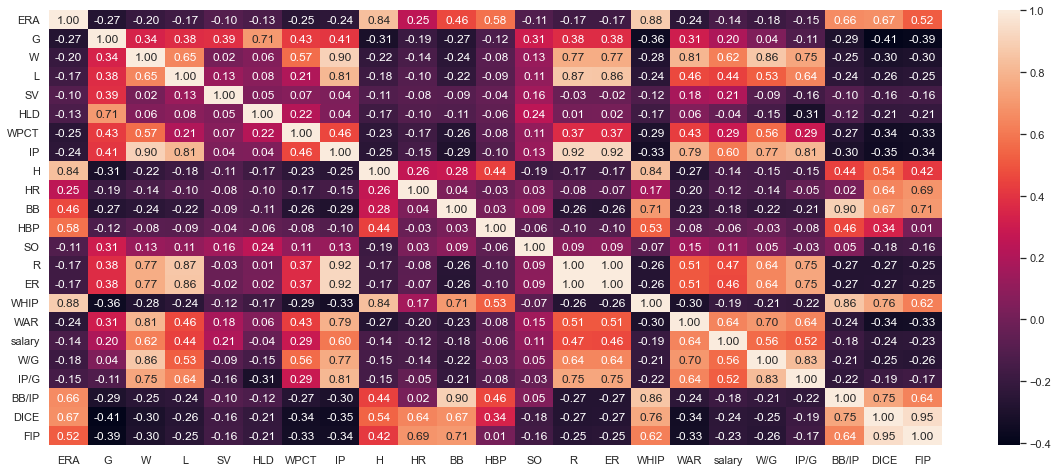

In [45]:
# 상관관계 히트맵
sns.set(rc = {'figure.figsize':(20,8)})
sns.heatmap(remain_df_war_.corr(), annot=True, fmt = '.2f', cmap = 'rocket');


In [155]:
# # 상관관계 히트맵
# sns.set(rc = {'figure.figsize':(20,8)})
# sns.heatmap(remain_df_nowar.corr(), annot=True, fmt = '.2f', cmap = 'rocket');


In [170]:
# remain_df_war['year'] = remain_df_war['year'].astype(str)
# summary(remain_df_war)

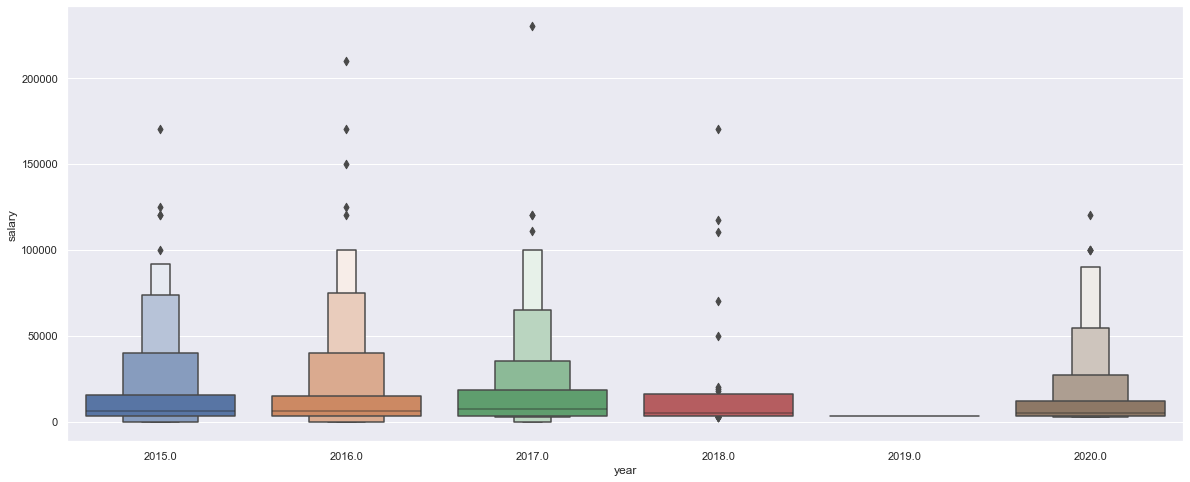

In [167]:
# 이상치가 분명 있다.
sns.boxenplot(data = remain_df_war, x='year', y = 'salary');

##### salary_p

In [269]:
# 연봉이 0인 그룹과 0이 아닌 그룹으로 구분하는 변수 생성

condition = [remain_df_war_.salary == 0]
choice = [0]
remain_df_war_['salary_p'] = np.select(condition, choice, default=1)
remain_df_war_.head(10)

,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,...,ER,WHIP,WAR,salary,W/G,IP/G,BB/IP,DICE,FIP,salary_p
0,0.00,1.0,0.0,0.0,0.0,0.0,0.000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.045,3000.0,0.000000,1.000000,0.000000,3.000000,3.200000,1
1,1.41,16.0,2.0,1.0,0.0,0.0,0.667,38.333333,7.747826,0.234783,...,6.0,1.226087,1.860,15000.0,0.125000,2.395833,3.286957,3.652174,3.852174,1
2,3.09,70.0,8.0,5.0,5.0,19.0,0.615,93.333333,6.267857,0.385714,...,32.0,1.200000,3.360,17000.0,0.114286,1.333333,4.532143,3.160714,3.167857,1
3,3.62,32.0,15.0,8.0,0.0,0.0,0.652,196.666667,8.694915,0.640678,...,79.0,1.311864,5.116,65000.0,0.468750,6.145833,3.111864,3.000000,3.184746,1
4,4.50,7.0,1.0,1.0,0.0,0.0,0.500,22.000000,10.227273,0.818182,...,11.0,1.863636,0.628,7900.0,0.142857,3.142857,6.545455,5.363636,5.290909,1
5,4.50,2.0,0.0,0.0,0.0,0.0,0.000,2.000000,13.500000,0.000000,...,1.0,1.500000,-0.025,0.0,0.000000,1.000000,0.000000,3.000000,3.200000,0
6,4.82,45.0,11.0,4.0,0.0,10.0,0.733,123.333333,9.194595,1.021622,...,66.0,1.459459,2.001,30000.0,0.244444,2.740741,3.940541,3.810811,3.694595,1
7,5.06,35.0,0.0,0.0,0.0,0.0,0.000,37.333333,8.678571,0.964286,...,21.0,1.580357,0.435,20000.0,0.000000,1.066667,5.544643,4.473214,4.191071,1
8,6.28,34.0,0.0,5.0,0.0,1.0,0.000,91.666667,11.192727,0.981818,...,64.0,1.723636,-0.492,11000.0,0.000000,2.696078,4.320000,4.592727,4.629091,1
9,7.04,13.0,0.0,2.0,0.0,1.0,0.000,15.333333,11.739130,1.173913,...,12.0,2.152174,-0.118,3400.0,0.000000,1.179487,7.630435,5.804348,5.417391,1


###### 연봉이 0인 그룹과 0이 아닌 그룹간의 특성 차이는 존재하는듯

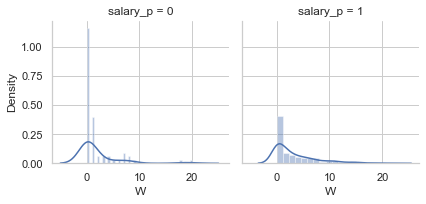

In [68]:
# W
sns.FacetGrid(remain_df_war_, col = 'salary_p').map(sns.distplot, 'W');

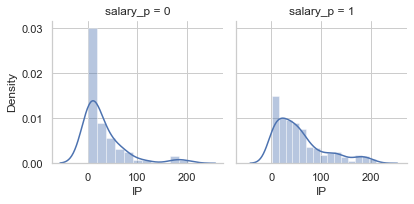

In [69]:
# IP
sns.FacetGrid(remain_df_war_, col = 'salary_p').map(sns.distplot, 'IP');

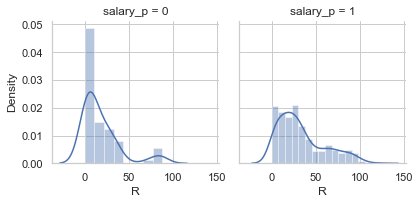

In [75]:
# SO
sns.FacetGrid(remain_df_war_, col = 'salary_p').map(sns.distplot, 'R');

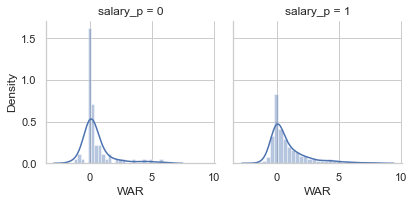

In [71]:
# WAR
sns.FacetGrid(remain_df_war_, col = 'salary_p').map(sns.distplot, 'WAR');

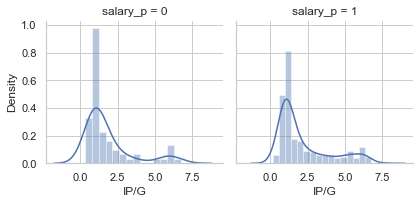

In [77]:
# FIP
sns.FacetGrid(remain_df_war_, col = 'salary_p').map(sns.distplot, 'IP/G');

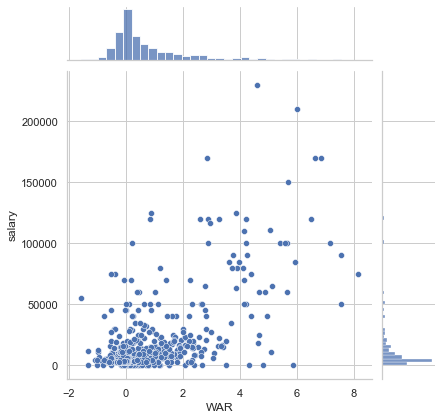

In [73]:
# jointplot
sns.jointplot(x=remain_df_war_['WAR'], y=remain_df_war_['salary'], kind='scatter');

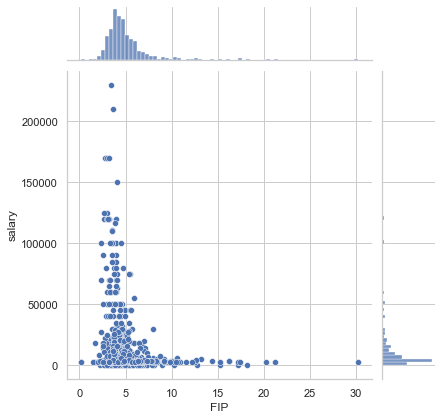

In [74]:
# jointplot
sns.jointplot(x=remain_df_war_['FIP'], y=remain_df_war_['salary'], kind='scatter');

- DICE, FIP : 연봉과 무관한 지표로 보임
- 상관계수 : 0.01 정도

In [187]:
# # jointplot
# sns.jointplot(x=remain_df_war['WAR'], y=remain_df_war.query("salary !=0")['salary'], kind='scatter');

#### 연봉의 분포를 파악해보자
- log transformation 취해도 여전히 편향 -> 아웃라이어 먼저 제거하고 log 취해보자

In [17]:

# def IQR_test(y, weight = 1.5):
#     q1, q3 = np.percentile(y, [25,75])
#     iqr = q3 - q1
#     lower_bound = q1 - (iqr * weight)
#     upper_bound = q3 + (iqr * weight)

#     idx = np.where( (y < lower_bound) | (y > upper_bound) )  # 이상치 확인
    
#     return idx

# temp = ['HT', 'WT', 'FFM', 'SMM', 'BFM', 'BMI', 'PBF', 'TBW','WHR']

# outlier = []

# for col in temp:
#     data1 = data.loc[:,col]
#     outlier_idx = IQR_test(data1)
#     outlier.append(outlier_idx[0])

# outlier = np.concatenate(outlier)
# outlier = np.unique(outlier)

# print(len(outlier))
# print(len(outlier)/len(data)) 

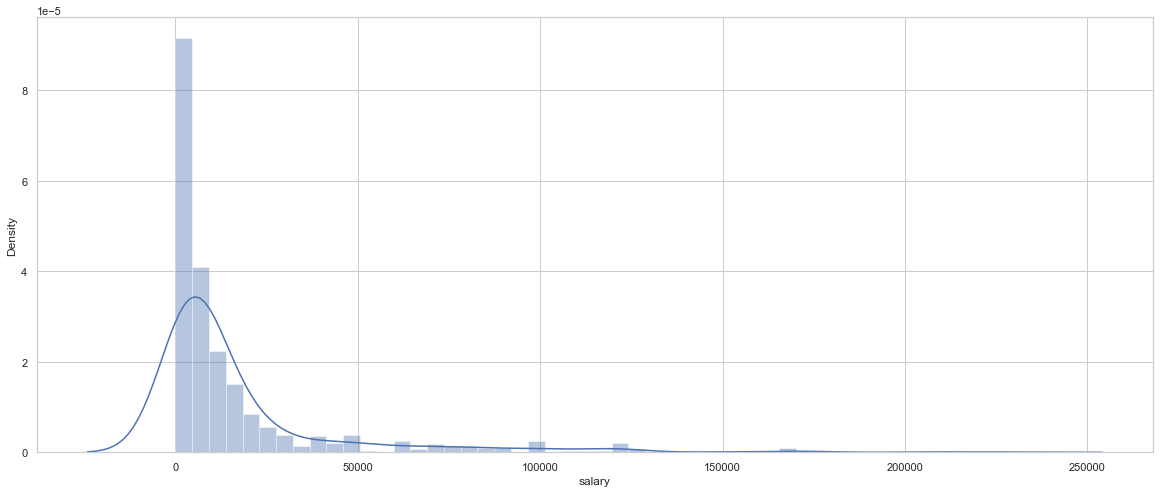

In [66]:
sns.set_style("whitegrid")
sns.distplot(remain_df_war_['salary']);

#### 연봉 Normalization

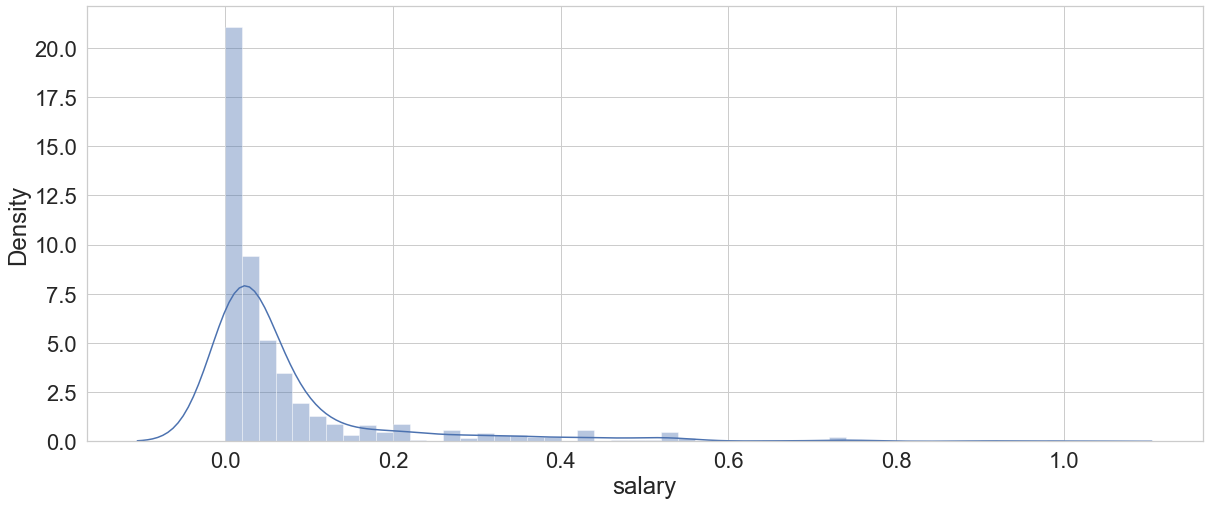

In [270]:
# 비율로 normalizing한 후
remain_df_war_['salary'] = (remain_df_war_['salary'] - min(remain_df_war_['salary'])) / (max(remain_df_war['salary'] - min(remain_df_war_['salary'])))
remain_df_war_['salary']

sns.set_style("whitegrid")
sns.distplot(remain_df_war_['salary']);

In [273]:
remain_df_war_.query('salary == 1.0')

,ERA,G,W,L,SV,HLD,WPCT,IP,H,HR,...,ER,WHIP,WAR,salary,W/G,IP/G,BB/IP,DICE,FIP,salary_p
392,3.44,31.0,20.0,6.0,0.0,0.0,0.769,193.333333,9.72931,0.791379,...,74.0,1.313793,4.599,1.0,0.645161,6.236559,2.094828,3.206897,3.406897,1


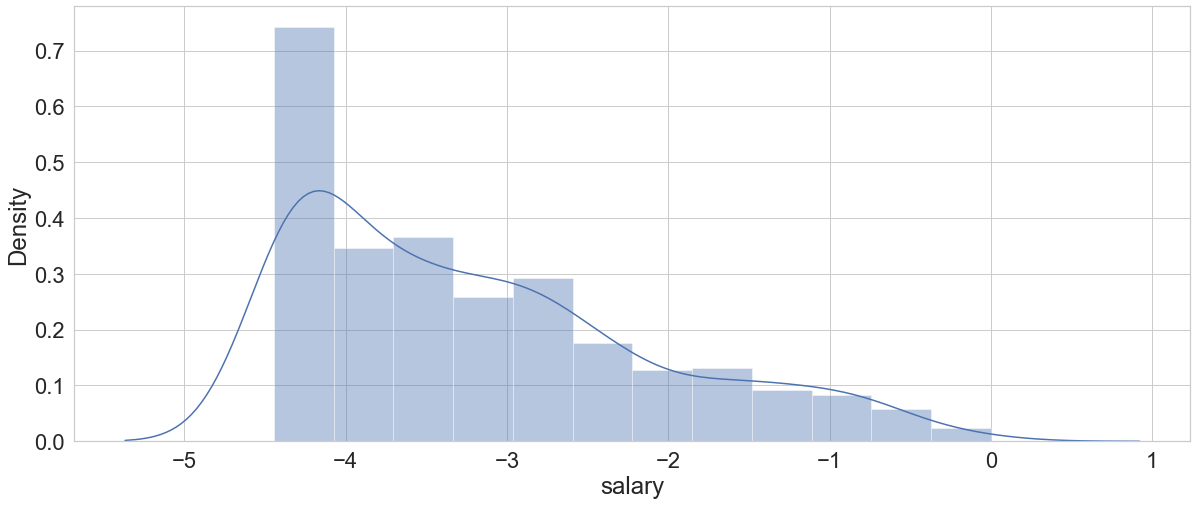

In [274]:
sns.distplot(np.log(remain_df_war_.query("salary !=0")['salary']));

In [275]:
remain_df_war_['salary'].value_counts(ascending=False).sort_index(ascending=False)

1.000000     1
0.913043     1
0.739130     3
0.652174     1
0.543478     2
0.521739     6
0.508696     1
0.482609     1
0.478261     1
0.434783     7
0.391304     3
0.369565     3
0.347826     4
0.326087     4
0.304348     5
0.282609     2
0.273913     1
0.260870     6
0.239130     1
0.217391    11
0.195652     6
0.173913    10
0.152174     3
0.143478     1
0.139130     1
0.130435     7
0.126087     1
0.121739     2
0.119565     1
0.117391     3
0.113043     1
0.108696     6
0.104348     1
0.102174     1
0.100000     3
0.097826     1
0.095652     3
0.093478     1
0.091304     4
0.086957     9
0.082609     2
0.081739     2
0.080435     2
0.078261     6
0.075652     1
0.073913     2
0.071739     1
0.069565     6
0.067391     2
0.065217    15
0.061739     1
0.060870     9
0.058696     2
0.056522     7
0.054348     5
0.052174    10
0.050000     4
0.047826    14
0.045652     3
0.043478    15
0.041304     2
0.040000     2
0.039130     7
0.038261     1
0.037826     1
0.036957     3
0.036087  

#### 연봉이 0인 선수들은 제외, 연봉이 높은 애들은 그대로
- 다만, 2015년도의 스탯과 16년도의 연봉을 매칭해보자
- remain_df = 2010~2015년도의 데이터

#### 모델링

##### Baseline
- 1. 연봉이 0인 선수 아닌 선수 구분하는 dummy 변수를 학습함으로써 연봉이 0인 선수 학습에 포함하기
- 2. 연봉이 0인 선수 제외하기 (학습 시, salary_p 변수 제외) -> 학습 오차는 줄어드는데, 과연 ..?
- - scaling을 안할 때 : 3억 , scaling을 할 때 : 5억 2천

In [566]:

len(temp)

555


553

In [567]:
# 결측치 존재하는 애들 확인
temp.columns[temp.isnull().sum() > 0]

Index([], dtype='object')

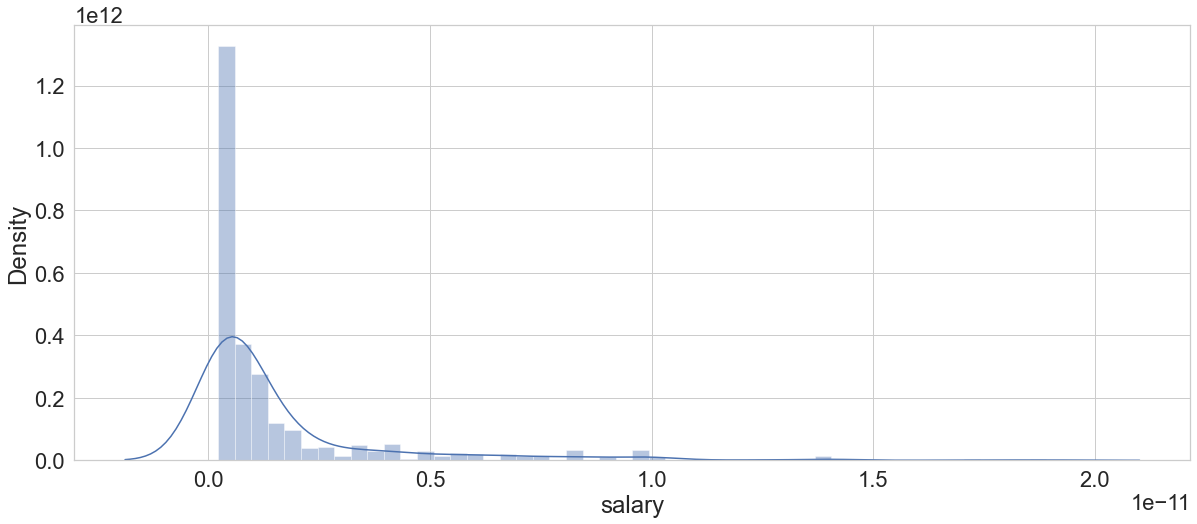

In [251]:
temp = remain_df_war_.query('salary_p == 1')
# summary(temp)
# temp.dropna(inplace= True)
sns.distplot(temp['salary']);


In [279]:
# 연봉이 0인 애들 제외

from sklearn.model_selection import train_test_split

temp = remain_df_war_.query('salary_p == 1')
temp.dropna(inplace= True)

x = temp.drop(columns = ['salary','salary_p'])
y = temp['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state= 28)

# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
el = ElasticNet()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : lr, rmse : {round(result,10)}')

ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : 릿지, rmse : {round(result,5)}')

# 분포 확인
# sns.distplot(y)

# # 연봉 0인 DATA 제외
# temp = remain_df.query('salary != 0')
# temp.reset_index(drop=True, inplace = True)
# temp

model : lr, rmse : 0.0080765155
model : 릿지, rmse : 0.008


In [281]:
print(x_train.columns)
len(x_train.columns)

Index(['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP',
       'SO', 'R', 'ER', 'WHIP', 'WAR', 'W/G', 'IP/G', 'BB/IP', 'DICE', 'FIP'],
      dtype='object')


22

In [283]:
choi = sub_1980.query("선수명 == '최동원'")
choi = choi[['ERA','G','W','L','SV','HLD','WPCT','IP','H','HR','BB','HBP','SO','R','ER']]

# WPCT 전처리 
choi['WPCT'] = choi['WPCT'].apply(lambda x: 0 if x == '-' else x) 

# ERA & WHIP
choi['ERA'] = choi['ERA'].apply(lambda x: 0 if x == '-' else x) 
# choi['WHIP'] = choi['WHIP'].apply(lambda x: 0 if x == '-' else x) 

# IP 전처리
choi['IP'] = choi['IP'].apply(convert_to_num)

# 수치형 변환
for col in choi.columns:
    try:
        choi[col] = choi[col].astype('float')
    except:
        print(col)

choi['WHIP'] = (choi.BB + choi.HBP + choi.H) / choi.IP # 수정 계수
choi['W/G'] = choi.W / choi.G
choi['IP/G'] = choi.IP / choi.G
choi['BB/IP'] = (choi.BB + choi.HBP)*9 / choi.IP
choi['DICE'] = 3.00 + (13 * choi.HR + 3*(choi.BB + choi.HBP) - 2* choi.SO) / choi.IP
choi['FIP'] = 3.20 + (13 * choi.HR + 3* choi.BB - 2* choi.SO) / choi.IP
choi['WAR'] = [7.193, 15.229, 13.482, 16.059, 9.736, 5.489] # WAR 값 추가

# 값이 변형됨
choi.SO = choi.SO *9 / choi.IP
choi.BB = choi.BB *9 / choi.IP
choi.HBP = choi.HBP *9 / choi.IP
choi.HR = choi.HR *9 / choi.IP
choi.H = choi.H *9 / choi.IP

# 변수 선택
selected = ['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R','ER','WHIP', 'WAR', 'W/G', 'IP/G', 'BB/IP','DICE','FIP'] 
choi = choi[selected]

lr.predict(choi)

#

array([0.39161436, 0.91634904, 0.80171091, 0.80009798, 0.52213422,
       0.44720657])

In [285]:
remain_df_war.salary

0       3000.0
1      15000.0
2      17000.0
3      65000.0
4       7900.0
        ...   
617     3100.0
618     2700.0
619    15500.0
620     3100.0
621     2700.0
Name: salary, Length: 622, dtype: float64

In [297]:
k = [0.39161436, 0.91634904, 0.80171091, 0.80009798, 0.52213422, 0.44720657]
k_new = list(map(lambda x: x* 100, k))
k_new

[39.161436, 91.63490399999999, 80.171091, 80.009798, 52.213422, 44.720657]

In [298]:
np.percentile(remain_df_war.salary, k_new)

array([ 4200.    , 55263.7692, 20000.    , 20000.    ,  6500.    ,
        5100.    ])

#### 아웃라이어 제거

In [660]:
def IQR_test(y, weight = 1.5):
    q1, q3 = np.percentile(y, [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (iqr * weight)
    upper_bound = q3 + (iqr * weight)

    idx = np.where( (y < lower_bound) | (y > upper_bound) )  # 이상치의 위치    
    return idx

In [299]:
# 연봉의 아웃라이어 제거
# 25% 이하는 제거
def IQR_test2(y, weight = 1.5):
    q1 = np.percentile(y, 25)
    
    lower_bound = q1 
    idx = np.where(y < lower_bound) # 이상치의 위치    
    return idx

In [300]:
temp = remain_df_war_.copy()
temp.dropna(inplace= True)
temp.reset_index(drop=True, inplace=True)
# cols = ['HT', 'WT', 'FFM', 'SMM', 'BFM', 'BMI', 'PBF', 'TBW','WHR']

outlier = []

# for col in temp.columns:
#     data = temp.loc[:,col]
#     outlier_idx = IQR_test(data)
#     outlier.append(outlier_idx[0])
    
data = temp.loc[:,'salary']
outlier_idx = IQR_test2(data)
outlier.append(outlier_idx[0])   

outlier = np.concatenate(outlier)
outlier_ls = np.unique(outlier)

print(len(outlier_ls))
print(len(temp))
print(len(outlier_ls)/len(temp)) 

152
620
0.24516129032258063


In [301]:
no_outlier  = temp.iloc[[i for i in temp.index if i not in outlier_ls],:]
no_outlier.columns

Index(['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP',
       'SO', 'R', 'ER', 'WHIP', 'WAR', 'salary', 'W/G', 'IP/G', 'BB/IP',
       'DICE', 'FIP', 'salary_p'],
      dtype='object')

In [89]:
# scaling 전

# 연봉이 0인 애들 제외
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae

from sklearn.model_selection import train_test_split


x = no_outlier.drop(columns = ['salary','salary_p'])
y = no_outlier['salary']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state= 28)

# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
el = ElasticNet()

lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : lr, mse : {result}')
print(f'model : lr, rmse : {np.sqrt(result)}')


ridge.fit(x_train,y_train)
y_pred = ridge.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : 릿지, mse : {result}')
print(f'model : 릿지, rmse : {np.sqrt(result)}')

lasso.fit(x_train,y_train)
y_pred = lasso.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : 라쏘, mse : {result}')
print(f'model : 라쏘, rmse : {np.sqrt(result)}')

el.fit(x_train,y_train)
y_pred = el.predict(x_test)
result = mean_squared_error(y_test, y_pred) 
print(f'model : 엘라스틱넷, mse : {result}')
print(f'model : 엘라스틱넷, rmse : {np.sqrt(result)}')

# 분포 확인
# sns.distplot(y)

# # 연봉 0인 DATA 제외
# temp = remain_df.query('salary != 0')
# temp.reset_index(drop=True, inplace = True)
# temp

model : lr, mse : 479899776.78729063
model : lr, rmse : 21906.614909366774
model : 릿지, mse : 478731379.7478103
model : 릿지, rmse : 21879.93098133105
model : 라쏘, mse : 479852840.7779758
model : 라쏘, rmse : 21905.54360836489
model : 엘라스틱넷, mse : 511958152.8361291
model : 엘라스틱넷, rmse : 22626.492278657093


0.05442992053997038
0.005736918270010463
0.07574244695024358


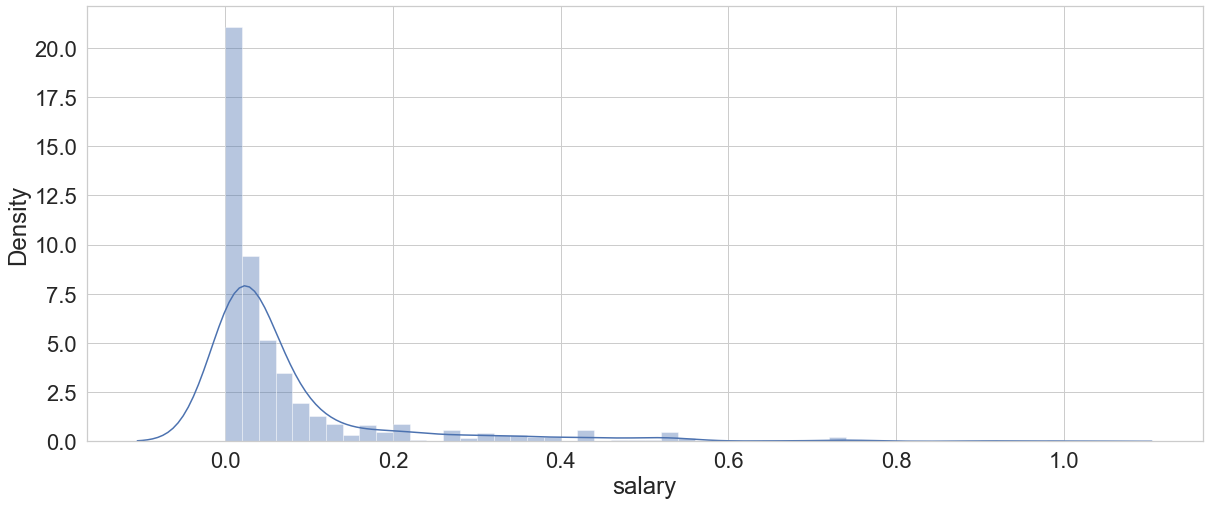

In [302]:
# scaling 후


from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error as mae
# scaler
rb = RobustScaler()
mm = MinMaxScaler()
sd = StandardScaler()
ma = MaxAbsScaler()

# model
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
el = ElasticNet()

# loop list
scaler_ls = [rb,mm,sd,ma]
test_size = list(np.arange(0.2,0.45,0.05))
model_ls = [lr, lasso, ridge, el]

# # no_outlier2 ... 중요한 변수들 & 연봉 1억인 선수들만
# no_outlier2 = no_outlier.query('salary > 10000')
# no_outlier2 = no_outlier2[['ERA','WPCT','IP','SO','WHIP']]


# X & Y
# x = no_outlier[['W','IP','WAR','W/G','IP/G','R']]
x = no_outlier.drop(columns = ['salary','salary_p'])
y = no_outlier['salary']


# 비율로 normalizing한 후
y = (y - min(y)) / (max(y) - min(y))

sns.set_style("whitegrid")
sns.distplot(remain_df_war_['salary']);


# 결과
result = {'모델':[],'size':[], 'x_scaler':[], 'y_scaler':[], 'mse':[],'rmse':[], 'mae':[]}

# 로그 변환된 y_train과 로그 변환된 y_test간의 차이로 비교할 수 밖에 없겟는걸..?

for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= size, shuffle=True, random_state= 30)

    for scaler1 in scaler_ls: # x_scale
        for scaler2 in scaler_ls: # y_scale   # fit과 transform 구분할 것!
            scaler1.fit(x_train)
            x_train_s = scaler1.transform(x_train)
            x_test_s = scaler1.transform(x_test)

            scaler2.fit(y_train.values.reshape(-1,1))
            y_train_s = scaler2.transform(y_train.values.reshape(-1,1))
            
            for model in model_ls:
                model.fit(x_train_s, y_train_s)
                y_pred = model.predict(x_test_s)
                y_pred_hat = scaler2.inverse_transform(y_pred.reshape(-1,1))
           
        
                msee = mean_squared_error(y_test, y_pred_hat)
                rmsee = np.sqrt(msee)
                maee = mae(y_test, y_pred_hat)
            

                # print(f'model : {model}, test_size : {size}, x의 scaler : {scaler1}, y의 scaler : {scaler2}, mse : {msee}, rmse: {rmsee}')
                result['모델'].append(model)
                result['size'].append(size)
                result['x_scaler'].append(scaler1)
                result['y_scaler'].append(scaler2)
                result['mse'].append(msee)
                result['rmse'].append(rmsee)
                result['mae'].append(maee)



print(min(result['mae']))                
print(min(result['mse']))
print(np.sqrt(min(result['mse'])))


In [101]:
result = pd.DataFrame(result)
result.query('rmse < 17200')

,모델,size,x_scaler,y_scaler,mse,rmse,mae
50,Ridge(),0.2,MaxAbsScaler(),RobustScaler(),2.953573e+08,17185.961213,12350.148971
54,Ridge(),0.2,MaxAbsScaler(),MinMaxScaler(),2.953573e+08,17185.961213,12350.148971
58,Ridge(),0.2,MaxAbsScaler(),StandardScaler(),2.953573e+08,17185.961213,12350.148971
62,Ridge(),0.2,MaxAbsScaler(),MaxAbsScaler(),2.953573e+08,17185.961213,12350.148971


In [120]:
result[['모델','size','x_scaler','y_scaler','rmse','mae']]

,모델,size,x_scaler,y_scaler,rmse,mae
0,LinearRegression(),0.2,RobustScaler(),RobustScaler(),18770.709623,12808.984662
1,Lasso(),0.2,RobustScaler(),RobustScaler(),23459.535081,16848.045382
2,Ridge(),0.2,RobustScaler(),RobustScaler(),18107.139033,12705.545068
3,ElasticNet(),0.2,RobustScaler(),RobustScaler(),20076.511790,14579.143076
4,LinearRegression(),0.2,RobustScaler(),MinMaxScaler(),18770.709623,12808.984662
...,...,...,...,...,...,...
315,ElasticNet(),0.4,MaxAbsScaler(),StandardScaler(),32858.197387,21165.896657
316,LinearRegression(),0.4,MaxAbsScaler(),MaxAbsScaler(),23415.133888,14609.216050
317,Lasso(),0.4,MaxAbsScaler(),MaxAbsScaler(),32858.197387,21165.896657
318,Ridge(),0.4,MaxAbsScaler(),MaxAbsScaler(),23479.910309,14479.220468


In [116]:
result['모델'].unique()[2]

Ridge()

In [118]:
result = pd.DataFrame(result)
result.loc[result.모델 == result['모델'].unique()[3],:]

,모델,size,x_scaler,y_scaler,mse,rmse,mae
3,ElasticNet(),0.20,RobustScaler(),RobustScaler(),4.030663e+08,20076.511790,14579.143076
7,ElasticNet(),0.20,RobustScaler(),MinMaxScaler(),6.667711e+08,25821.912047,18433.860507
11,ElasticNet(),0.20,RobustScaler(),StandardScaler(),5.440811e+08,23325.546133,16817.310885
15,ElasticNet(),0.20,RobustScaler(),MaxAbsScaler(),6.667711e+08,25821.912047,18433.860507
19,ElasticNet(),0.20,MinMaxScaler(),RobustScaler(),6.667711e+08,25821.912047,18433.860507
23,ElasticNet(),0.20,MinMaxScaler(),MinMaxScaler(),6.667711e+08,25821.912047,18433.860507
27,ElasticNet(),0.20,MinMaxScaler(),StandardScaler(),6.667711e+08,25821.912047,18433.860507
31,ElasticNet(),0.20,MinMaxScaler(),MaxAbsScaler(),6.667711e+08,25821.912047,18433.860507
35,ElasticNet(),0.20,StandardScaler(),RobustScaler(),3.950253e+08,19875.242443,14693.225921
39,ElasticNet(),0.20,StandardScaler(),MinMaxScaler(),6.667711e+08,25821.912047,18433.860507


##### 파이프라인

- 최동원 선수 전처리

In [303]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LassoCV , ElasticNetCV , RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 

from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.cross_decomposition import PLSRegression as  PLS
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import ShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error as mae
# from sklearn.metrics import mean_absolute_percentage_error as mape

### 최동원 선수 전처리 ###
choi = sub_1980.query("선수명 == '최동원'")
choi = choi[['ERA','G','W','L','SV','HLD','WPCT','IP','H','HR','BB','HBP','SO','R',]]

# WPCT 전처리 
choi['WPCT'] = choi['WPCT'].apply(lambda x: 0 if x == '-' else x) 

# ERA & WHIP
choi['ERA'] = choi['ERA'].apply(lambda x: 0 if x == '-' else x) 
# choi['WHIP'] = choi['WHIP'].apply(lambda x: 0 if x == '-' else x) 

# IP 전처리
choi['IP'] = choi['IP'].apply(convert_to_num)

# 수치형 변환
for col in choi.columns:
    try:
        choi[col] = choi[col].astype('float')
    except:
        print(col)

choi['WHIP'] = (choi.BB + choi.HBP + choi.H) / choi.IP # 수정 계수
choi['W/G'] = choi.W / choi.G
choi['IP/G'] = choi.IP / choi.G
choi['BB/IP'] = (choi.BB + choi.HBP)*9 / choi.IP
# choi['DICE'] = 3.00 + (13 * choi.HR + 3*(choi.BB + choi.HBP) - 2* choi.SO) / choi.IP
# choi['FIP'] = 3.20 + (13 * choi.HR + 3* choi.BB - 2* choi.SO) / choi.IP
choi['WAR'] = [7.193, 15.229, 13.482, 16.059, 9.736, 5.489] # WAR 값 추가

# 값이 변형됨
choi.SO = choi.SO *9 / choi.IP
choi.BB = choi.BB *9 / choi.IP
choi.HBP = choi.HBP *9 / choi.IP
choi.HR = choi.HR *9 / choi.IP
choi.H = choi.H *9 / choi.IP

# 변수 선택
selected = ['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP', 'SO', 'R', 'WHIP', 'WAR', 'W/G', 'IP/G', 'BB/IP'] 
choi = choi[selected]
########################################


x = no_outlier.drop(columns = ['salary','salary_p','DICE','FIP','ER'])
y = no_outlier['salary']
y = (y - min(y)) / (max(y) - min(y))


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= size, shuffle=True, random_state= 30)


cv = ShuffleSplit(n_splits=5 , test_size=0.3, random_state=42)
pipe_linear = Pipeline([
                ('scl', RobustScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', LinearRegression())])
pipe_lasso = Pipeline([
                ('scl', RobustScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Lasso(random_state = 42))])
pipe_ridge = Pipeline([
                ('scl', RobustScaler()),
                ('poly', PolynomialFeatures()),
                 ('fit', Ridge(random_state = 42))])
pipe_pca = Pipeline([
                ('scl', RobustScaler()),
                ('pca', PCA()),
                 ('fit', Ridge(random_state = 42))])
pipe_pls = Pipeline([
                ('scl', RobustScaler()),
                 ('fit', PLS())])
pipe_gbr = Pipeline([
                ('scl', RobustScaler()),
                 ('fit', GBR())])
pipe_rfr = Pipeline([
                ('scl', RobustScaler()),
                 ('fit', RFR())])
pipe_svr = Pipeline([
                ('scl', RobustScaler()),
                 ('fit', SVR())])

pipe_KR = Pipeline([
                ('scl', RobustScaler()),
                 ('fit', KernelRidge())])
                 
                 
### 

grid_params_linear = [{
    "poly__degree" : np.arange(1,3), 
    "fit__fit_intercept" : [True, False], 
}]
grid_params_lasso = [{
    "poly__degree" : np.arange(1,3),
    "fit__tol" : np.logspace(-5,0,10) ,
    "fit__alpha" : [1000,10000,100000] ,
    
                     }]
grid_params_pca = [{
    "pca__n_components" : np.arange(2,8)
}]
grid_params_ridge = [{
    "poly__degree" : np.arange(1,3),
    "fit__alpha" : np.linspace(2,5,10) ,
    "fit__solver" : [ "cholesky","lsqr","sparse_cg"] ,
    "fit__tol" : np.logspace(-5,3,10) ,
                     }]
grid_params_pls = [{
    "fit__n_components" : np.arange(2,8)
}]
min_samples_split_range = [0.5, 0.7 , 0.9]

grid_params_gbr =[{
    "fit__max_features" : ["sqrt","log2"] ,
    "fit__loss" : ["ls","lad","huber","quantile"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_rfr =[{
    "fit__max_features" : ["sqrt","log2"] , 
    "fit__max_depth" : [5,6,7,8] ,
    "fit__min_samples_split" : min_samples_split_range ,
}]
grid_params_svr =[{
    "fit__kernel" : ["rbf", "linear"] ,
    "fit__degree" : [2, 3, 5] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
grid_params_KR =[{
    "fit__kernel" : ["rbf","linear"] , 
    "fit__gamma" : np.logspace(-5,1,10) ,
}]
pipe = [
    pipe_linear , pipe_lasso ,  pipe_pca ,
    pipe_ridge , pipe_pls , pipe_gbr , 
    pipe_rfr , pipe_svr , pipe_KR 
]

params = [
    grid_params_linear , grid_params_lasso , grid_params_pca,
    grid_params_ridge , grid_params_pls , grid_params_gbr ,
    grid_params_rfr , grid_params_svr , grid_params_KR
]

jobs = -1

grid_dict = {
    0: 'Linear', 
    1: 'Lasso', 
    2: 'pca regression' , 
    3: 'Ridge' ,
    4: 'PLSRegression',
    5: "GradientBoostingRegressor" ,
    6: "RandomForestRegressor" ,
    7: "SupportVectorRegressor" ,
    8: "Kernel RidgeRegression"
            }

model_rmse = {}
model_mae = {}
# model_mape = {}
model_r2 = {}
model_best_params = {}
choi_params = {}
choi_result = {}

for idx , (param , model) in enumerate(zip(params , pipe)) :
    search = GridSearchCV(model, param, scoring  = "r2" , 
                          cv=cv , n_jobs=jobs , verbose=-1 )
    search.fit(X_train , y_train)
    y_pred = search.predict(X_test)
    
    # 최동원 연봉 예측
    choi_pred = search.predict(choi) 
    choi_result[grid_dict.get(idx)] = choi_pred
    choi_params[grid_dict.get(idx)] = search.best_estimator_.named_steps['fit']
    model_rmse[grid_dict.get(idx)] = np.sqrt(mse(y_test, y_pred))  
    model_mae[grid_dict.get(idx)] = mae(y_test, y_pred)  
#     model_mape[grid_dict.get(idx)] = mape(y_test, y_pred)  
    model_r2[grid_dict.get(idx)] = r2(y_test, y_pred)  
    model_best_params[grid_dict.get(idx)] = search.best_params_

print("finish")



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2938 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 3000 out of 3000 | elapsed:   10.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


finish


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


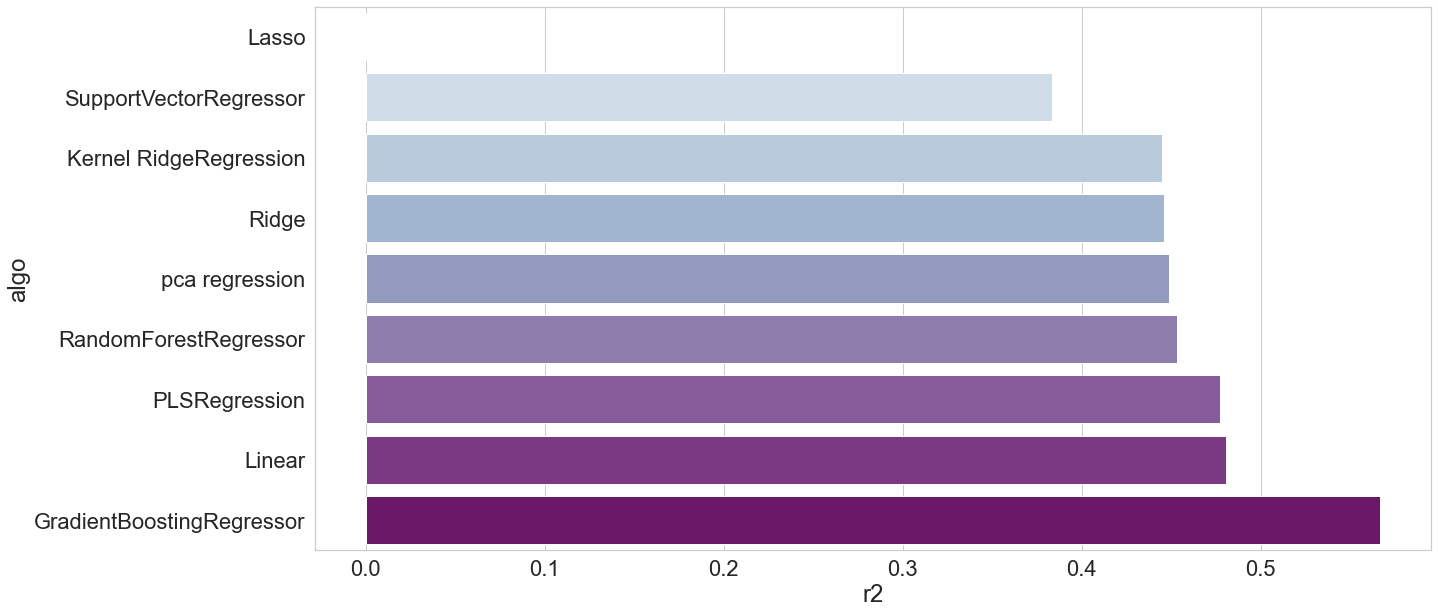

In [304]:
sns.set_style("whitegrid")
fig ,ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale = 2)
output = pd.DataFrame([model_r2.keys() , model_r2.values()], index = ["algo","r2"]).T
output.sort_values(["r2"], ascending= True ,inplace=True)
ax = sns.barplot(y="algo", x="r2", data=output, palette='BuPu')
plt.show()

In [305]:
# rmse
print(sorted(model_rmse.items(), key = lambda item: item[1], reverse = False))
print('rmse : --------------------------------------------------------------')

# mae
print(sorted(model_mae.items(), key = lambda item: item[1], reverse = False))
print('mae : --------------------------------------------------------------')

# mape
# print(sorted(model_mape.items(), key = lambda item: item[1], reverse = False))
# print('mape : --------------------------------------------------------------')

# r2
print(sorted(model_r2.items(), key = lambda item: item[1], reverse = True))
print('r2 : --------------------------------------------------------------')

model_best_params['GradientBoostingRegressor']

[('GradientBoostingRegressor', 0.09528905250093503), ('Linear', 0.10434444326707157), ('PLSRegression', 0.1047177500835595), ('RandomForestRegressor', 0.10706863025212279), ('pca regression', 0.10751002080122855), ('Ridge', 0.10779281624310806), ('Kernel RidgeRegression', 0.10787892327151256), ('SupportVectorRegressor', 0.1137327364907896), ('Lasso', 0.14481356274760765)]
rmse : --------------------------------------------------------------
[('GradientBoostingRegressor', 0.05203472747436228), ('Kernel RidgeRegression', 0.06331671959596036), ('RandomForestRegressor', 0.06400759588453235), ('Linear', 0.06459809015191204), ('PLSRegression', 0.06607448312696686), ('pca regression', 0.06917214332799607), ('Ridge', 0.07017102893734702), ('SupportVectorRegressor', 0.08592200740002189), ('Lasso', 0.09328292929279397)]
mae : --------------------------------------------------------------
[('GradientBoostingRegressor', 0.5670192383311388), ('Linear', 0.48081607745295385), ('PLSRegression', 0.4770

{'fit__loss': 'huber',
 'fit__max_depth': 5,
 'fit__max_features': 'sqrt',
 'fit__min_samples_split': 0.9}

## 최동원 선수 연봉은?



In [307]:
# 조정된 IQR 썼을 때
pd.DataFrame(np.percentile(no_outlier['salary'],choi_result['GradientBoostingRegressor']), columns = ['salary'], index = [1983,1984,1985,1986,1987,1988]).T

,1983,1984,1985,1986,1987,1988
salary,0.013478,0.013478,0.013478,0.013478,0.013478,0.013478


In [ ]:
np.percentile(remain_df_war.salary, k_new)

In [308]:
no_outlier['salary'],

(1      0.065217
 2      0.073913
 3      0.282609
 4      0.034348
 6      0.130435
          ...   
 613    0.014783
 614    0.119565
 615    0.013478
 617    0.067391
 618    0.013478
 Name: salary, Length: 468, dtype: float64,)

In [229]:
# 조정된 IQR 썼을 때
pd.DataFrame(choi_result['GradientBoostingRegressor'], columns = ['salary'], index = [1983,1984,1985,1986,1987,1988]).T

,1983,1984,1985,1986,1987,1988
salary,97146.889066,136738.864265,88615.87465,151198.667838,158903.07573,35835.885082


In [228]:
choi_params['GradientBoostingRegressor']

GradientBoostingRegressor(loss='huber', max_depth=8, max_features='log2',
                          min_samples_split=0.9)

In [225]:
print(choi_params['Lasso'].coef_.T)

[   0.          839.59171761   -0.            0.           -0.
  939.33339538   -0.           -0.            0.            0.
 -327.84954609 -118.9578518  -462.34197679   -0.            0.
   -0.         9976.4814779  9555.28743933  149.37801317 -210.68500128]


In [226]:
col = ['intercept']
col.extend(X_train.columns)


In [227]:
print(choi_params['Lasso'])
pd.DataFrame(choi_params['Lasso'].coef_.T, index = col, columns = ['Variable'])

Lasso(alpha=1000, random_state=42, tol=0.021544346900318846)


,Variable
intercept,0.000000
ERA,839.591718
G,-0.000000
W,0.000000
L,-0.000000
SV,939.333395
HLD,-0.000000
WPCT,-0.000000
IP,0.000000
H,0.000000


In [198]:
len(lasso.coef_)

19

In [212]:
print(X_train.columns)
print(len(X_train.columns)) 
lasso = Lasso(alpha = 1000, random_state=42, tol=1e-05) # alpha값이 클수록 패널티 쌔게
lasso.fit(X_train , y_train)
lasso.predict(choi)

# col = ['intercept']
# col.extend(X_train.columns)
coef = pd.DataFrame(lasso.coef_, index = X_train.columns, columns = ['Variable'])
result = pd.DataFrame(lasso.predict(choi), columns = ['salary'], index = [1983,1984,1985,1986,1987,1988])

display(coef, result)

Index(['ERA', 'G', 'W', 'L', 'SV', 'HLD', 'WPCT', 'IP', 'H', 'HR', 'BB', 'HBP',
       'SO', 'R', 'WHIP', 'WAR', 'W/G', 'IP/G', 'BB/IP'],
      dtype='object')
19


,Variable
ERA,0.000000
G,89.282357
W,2566.361550
L,-135.175553
SV,962.211624
HLD,0.000000
WPCT,-0.000000
IP,-216.460695
H,292.539441
HR,-331.893401


,salary
1983,67001.367069
1984,153510.872847
1985,136480.250152
1986,144033.052122
1987,100243.697151
1988,72796.550579


### 다중공선성 
- 의미 없을 듯

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.formula.api import ols

# VIF 계수 체크를 위해 모델 피팅
model1 = ols('SALARY ~ ERA + G + W + L + SV + HLD + WPCT + IP + H + HR + BB + HBP + SO + R + ER + WHIP + WAR', remain_df)
result1 = model1.fit()
# result1.summary()

model2 = ols('SALARY ~ ERA + G + W + L + SV + HLD + WPCT + IP + H + HR + BB + HBP + SO + ER + WHIP + WAR', remain_df)
result2 = model2.fit()
# result2.summary()

model3 = ols('SALARY ~ ERA + G + W + L + SV + HLD + WPCT + IP + HR + BB + HBP + SO + ER + WHIP + WAR', remain_df)
result3 = model3.fit()

model4 = ols('SALARY ~ ERA + G + W + L + SV + HLD + WPCT + HR + BB + HBP + SO + ER + WHIP + WAR', remain_df)
result4 = model4.fit()

model5 = ols('SALARY ~ ERA + G + W + L + SV + HLD + WPCT + HBP + SO + WHIP + WAR', remain_df) 
result5 = model5.fit()

# VIF 계수 데이터프레임
df1 = pd.DataFrame({'컬럼': column, 'VIF': vif(model1.exog, i)} 
             for i, column in enumerate(model1.exog_names)
             if column != 'Intercept')



df2 = pd.DataFrame({'컬럼': column, 'VIF': vif(model2.exog, i)} 
             for i, column in enumerate(model2.exog_names)
             if column != 'Intercept')

df3 = pd.DataFrame({'컬럼': column, 'VIF': vif(model3.exog, i)} 
             for i, column in enumerate(model3.exog_names)
             if column != 'Intercept')

df4 = pd.DataFrame({'컬럼': column, 'VIF': vif(model4.exog, i)} 
             for i, column in enumerate(model4.exog_names)
             if column != 'Intercept')    

df5 = pd.DataFrame({'컬럼': column, 'VIF': vif(model5.exog, i)} 
             for i, column in enumerate(model5.exog_names)
             if column != 'Intercept') 


# 모델링

x = remain_df[['ERA','G','W','L','SV','HLD','WPCT','HBP','SO','WHIP','WAR']]
y = remain_df['SALARY']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state= 28)

# 선형 회귀

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

result = mean_squared_error(y_test, y_pred) 

# 분포 확인
sns.distplot(y)

# 연봉 0인 DATA 제외
temp = remain_df.query('salary != 0')
temp.reset_index(drop=True, inplace = True)
temp

# 변수를 제외해도, 연봉과 일변수 간의 상관계수는 변함이 없음! 

- salary ~ ERA + G + W + L + SV + HLD + WPCT + HBP + SO + WHIP + WAR

- 정제된 df : remain_df
- 이상치 확인
- scaling (y : log transformation)

In [ ]:
# 성능 : Raw 하게 돌려보기 
